# Read Data

In [1]:
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
data = pd.read_csv(r'/home/aaa470/gsoc/code/annotation.csv')
data

,Unnamed: 0,name,start_time,end_time,target
0,0,M2BS24P3,0.2,1.2,0
1,1,M2BS24P3,1.4,2.4,0
2,2,M2BS24P3,2.6,3.6,0
3,3,M2BS24P3,3.8,4.8,1
4,4,M2BS24P3,5.0,6.0,0
...,...,...,...,...,...
19102,19102,F2BS02P5,27.8,28.8,1
19103,19103,F2BS02P5,29.0,30.0,0
19104,19104,F2BS02P5,30.2,31.2,0
19105,19105,F2BS02P5,31.4,32.4,1


In [3]:
data['target'].value_counts()

target
0    11239
1     7868
Name: count, dtype: int64

In [4]:
import numpy as np

# Load the saved .npz file
num_data = np.load("all_frame_snippets.npz", allow_pickle=True)

# Retrieve the frame snippets and embeddings
frame_snippets = num_data["frame_snippets"]


In [5]:
frame_snippets[0]

{'name': 'M2BS24P3.wav',
 'start_time': 0.2,
 'end_time': 1.2,
 'embeddings': array([[-4.2187799e-02,  2.4196939e-01,  3.3333007e-02, ...,
         -8.5409455e-02, -2.5977384e-02, -3.6795463e-02],
        [-4.1441415e-02,  2.3888399e-01,  3.1850282e-02, ...,
         -7.1899995e-02, -3.1433553e-02, -3.8360741e-02],
        [-9.4579525e-02, -5.6911781e-03,  1.4942250e-01, ...,
          9.7062998e-02, -1.4417510e-01, -3.9152592e-02],
        ...,
        [-3.2114323e-02,  2.3110186e-01,  5.4990808e-03, ...,
         -8.4011041e-02,  3.6408934e-03, -2.7097853e-02],
        [-3.3829678e-02,  2.2495380e-01,  7.9835281e-03, ...,
         -8.6970754e-02, -4.7619045e-03, -2.4850897e-02],
        [-3.4508813e-02,  2.1230572e-01,  7.7835401e-03, ...,
         -9.1179743e-02,  2.1480254e-04, -2.4080541e-02]], dtype=float32)}

In [6]:
embeddings_list = [item['embeddings'] for item in frame_snippets]

# Convert the list of arrays into a single array
x = np.vstack(embeddings_list)

In [7]:
embeddings_list[0]

array([[-4.2187799e-02,  2.4196939e-01,  3.3333007e-02, ...,
        -8.5409455e-02, -2.5977384e-02, -3.6795463e-02],
       [-4.1441415e-02,  2.3888399e-01,  3.1850282e-02, ...,
        -7.1899995e-02, -3.1433553e-02, -3.8360741e-02],
       [-9.4579525e-02, -5.6911781e-03,  1.4942250e-01, ...,
         9.7062998e-02, -1.4417510e-01, -3.9152592e-02],
       ...,
       [-3.2114323e-02,  2.3110186e-01,  5.4990808e-03, ...,
        -8.4011041e-02,  3.6408934e-03, -2.7097853e-02],
       [-3.3829678e-02,  2.2495380e-01,  7.9835281e-03, ...,
        -8.6970754e-02, -4.7619045e-03, -2.4850897e-02],
       [-3.4508813e-02,  2.1230572e-01,  7.7835401e-03, ...,
        -9.1179743e-02,  2.1480254e-04, -2.4080541e-02]], dtype=float32)

# Split Data set into Train and test

In [8]:
x = []

for i in range(0 , len(embeddings_list)):
    x.append(embeddings_list[i])   

In [9]:
x[0]

array([[-4.2187799e-02,  2.4196939e-01,  3.3333007e-02, ...,
        -8.5409455e-02, -2.5977384e-02, -3.6795463e-02],
       [-4.1441415e-02,  2.3888399e-01,  3.1850282e-02, ...,
        -7.1899995e-02, -3.1433553e-02, -3.8360741e-02],
       [-9.4579525e-02, -5.6911781e-03,  1.4942250e-01, ...,
         9.7062998e-02, -1.4417510e-01, -3.9152592e-02],
       ...,
       [-3.2114323e-02,  2.3110186e-01,  5.4990808e-03, ...,
        -8.4011041e-02,  3.6408934e-03, -2.7097853e-02],
       [-3.3829678e-02,  2.2495380e-01,  7.9835281e-03, ...,
        -8.6970754e-02, -4.7619045e-03, -2.4850897e-02],
       [-3.4508813e-02,  2.1230572e-01,  7.7835401e-03, ...,
        -9.1179743e-02,  2.1480254e-04, -2.4080541e-02]], dtype=float32)

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
max_length = max(len(arr) for arr in x)
padded_train_data = pad_sequences(x, maxlen=max_length, padding='post', dtype='float32')
y = data['target']

# Split padded_train_data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(padded_train_data, y, 
                                                                    test_size=0.2, random_state=42)


2023-08-08 12:00:41.162287: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 12:00:41.212783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 12:00:41.214002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 12:00:42.089324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
len(train_data) , len(test_data) , len(train_labels) , len(test_labels)

(15285, 3822, 15285, 3822)

In [12]:
type(train_data)

numpy.ndarray

# Build DL Model 

In [13]:

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization

from tensorflow.keras.optimizers import Adam
ad=Adam(learning_rate = 0.01 , beta_1=0.9,
    beta_2=0.29,  epsilon=1e-03)

2023-08-08 12:00:46.129040: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(max_length, 1024)))
model.add(BatchNormalization())

#model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(20, activation='relu'))

model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49, 300)           307500    
                                                                 
 batch_normalization (Batch  (None, 49, 300)           1200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 49, 200)           60200     
                                                                 
 batch_normalization_1 (Bat  (None, 49, 200)           800       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 49, 150)           30150     
                                                                 
 batch_normalization_2 (Bat  (None, 49, 150)           6

In [15]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])

In [16]:
# Split padded_train_data into train and test sets
train_data, x_val, train_labels, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)  # Split the remaining data into training and validation


In [17]:
history = model.fit(train_data, train_labels, validation_data=(x_val, y_val), batch_size=64, epochs=50)


Epoch 1/50
192/192 [==============================] - 9s 32ms/step - loss: 0.6893 - accuracy: 0.5656 - val_loss: 0.6807 - val_accuracy: 0.5882
Epoch 2/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6793 - accuracy: 0.5875 - val_loss: 0.6787 - val_accuracy: 0.5882
Epoch 3/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6780 - accuracy: 0.5886 - val_loss: 0.6921 - val_accuracy: 0.5242
Epoch 4/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6773 - accuracy: 0.5893 - val_loss: 0.6814 - val_accuracy: 0.5882
Epoch 5/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6763 - accuracy: 0.5892 - val_loss: 0.6984 - val_accuracy: 0.5881
Epoch 6/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6754 - accuracy: 0.5894 - val_loss: 0.7001 - val_accuracy: 0.5882
Epoch 7/50
192/192 [==============================] - 5s 28ms/step - loss: 0.6752 - accuracy: 0.5889 - val_loss: 0.7201 - val_accuracy: 0.5073

In [18]:
y_pred = model.predict(test_data)

y_pred_binary = np.argmax(y_pred, axis=1)
y_pred_binary = np.where(y_pred_binary == 1, 1, 0)  # Convert 1 to 1, and 0 to 0

print(y_pred_binary)


120/120 [==============================] - 1s 6ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


model.evaluate( test_labels , y_pred )

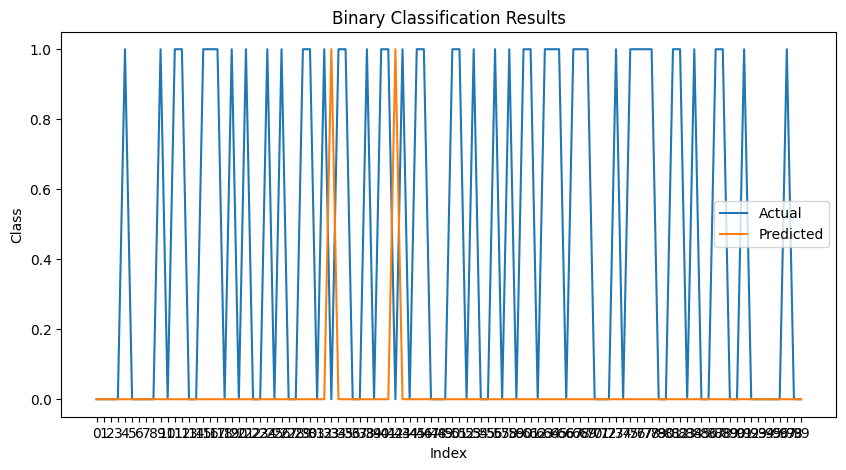

In [19]:
import matplotlib.pyplot as plt

# Generating indices for the x-axis
indices = list(range(len(test_labels[:100])))
plt.figure(figsize = (10,5))
plt.plot(indices, test_labels[:100], label='Actual')
plt.plot(indices, y_pred_binary[:100], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Class')
plt.title('Binary Classification Results')
plt.legend()
plt.xticks(indices)
plt.show()



In [25]:
test_labels.value_counts()

target
0    2227
1    1595
Name: count, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix


print(confusion_matrix(y_pred_binary, test_labels))

tn, fp, fn, tp = confusion_matrix(test_labels, y_pred_binary).ravel()

specificity_tra = round(tn / (tn+fp) , 4)
acc_tra=round(accuracy_score(y_pred_binary,test_labels),4)
rec_tra = round(recall_score(y_pred_binary,test_labels),4)
pre_tra= round(precision_score(y_pred_binary,test_labels),4)
f1_tra=round(f1_score(y_pred_binary,test_labels) , 4)

print("accuracy_score : " , acc_tra)
print("recall_score : " ,rec_tra)
print("precision_score : ",pre_tra)
print("f1_score : " ,f1_tra)
print("specificity :", specificity_tra)


[[2188 1576]
 [  39   19]]
accuracy_score :  0.5774
recall_score :  0.3276
precision_score :  0.0119
f1_score :  0.023
specificity : 0.9825
